In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [3]:
#EDA activities


df.head(4)



,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes


In [4]:
#df.columns.values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [3]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [22]:
#Provide the trend chart for the number of complaints at monthly and daily granularity levels.

df['Date_month_year'] = pd.to_datetime(df['Date_month_year'])
df['proj_month'] =  df['Date_month_year'].apply(lambda x: x.month)
df['proj_Day'] = df['Date_month_year'].apply(lambda x: x.day)
df['proj_Day of Week'] = df['Date_month_year'].apply(lambda x: x.dayofweek)
fan = {0:'Mon', 1:'Tue', 2: 'Wed', 3:'Thur', 4: 'Fri', 5:'Sat', 6: 'Sun'}
df['proj_Day of Week'] = df['proj_Day of Week'].map(fan)
df.head(3)



,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,proj_month,proj_Day,proj_Day of Week
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Wed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Tue
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Sat


<AxesSubplot:xlabel='proj_Day of Week'>

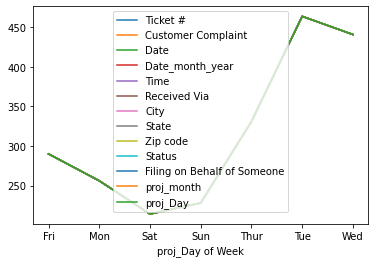

In [5]:
df.groupby('proj_Day of Week').count().plot()


<AxesSubplot:xlabel='proj_month'>

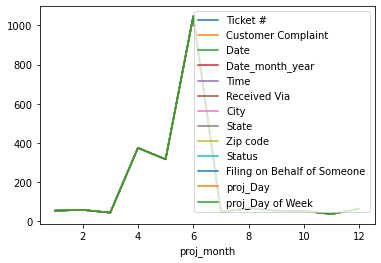

In [6]:
df.groupby('proj_month').count().plot()


<AxesSubplot:xlabel='proj_Day'>

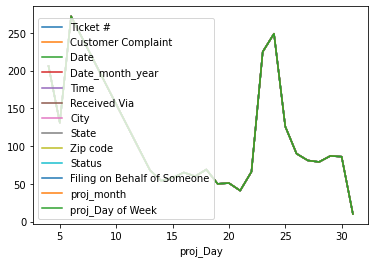

In [7]:
df.groupby('proj_Day').count().plot()



In [10]:
#frequency of complain types
df['Customer Complaint'].value_counts()


Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1841, dtype: int64

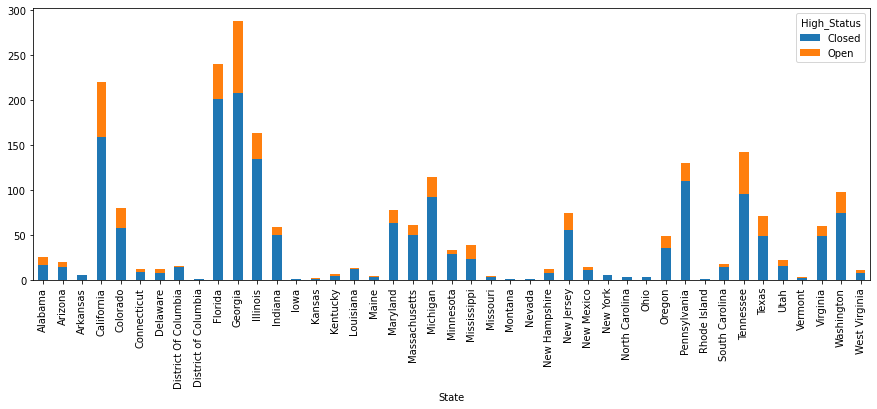

In [23]:
#Create a new categorical variable with value as Open and Closed. Open & Pending is to
#be categorized as Open and Closed & Solved is to be categorized as Closed.
df['Status'].unique()
df['High_Status'] = [ "Open" if Status == "Open" or Status == "Pending" else "Closed" for Status in df["Status"]]

df_stbar = df.groupby(['State', 'High_Status']).size().unstack().plot(kind = 'bar', stacked = True, figsize= (15, 5))



In [24]:
#state with highest number of complains

#df1= df.groupby(['State', 'High_Status']).size().unstack()
#df1['Total']= df1['Open']+ df1['Closed']

df2= df.groupby(["State"]).size().sort_values(ascending = False).to_frame().rename({0: "Complaint count"}, axis=1)[:1]
print("State with highet number of complains:- \n")
df2


State with highet number of complains:- 



,Complaint count
State,
Georgia,288


In [31]:
#State with highest number of unresolved complains
CT = df.groupby(["State","High_Status"]).size().unstack().fillna(0)
CT.sort_values('Closed',axis = 0,ascending=False)[:1]

High_Status,Closed,Open
State,,
Georgia,208.0,80.0


In [33]:
#highest unresolved percentage
CT['Unresolved_cmp_prct'] = CT['Open']/CT['Open'].sum()*100
CT.sort_values('Unresolved_cmp_prct', axis = 0, ascending = False)[:1]


High_Status,Closed,Open,Unresolved_cmp_prct
State,,,
Georgia,208.0,80.0,15.473888


In [35]:
# percentage of complaints resolved till date, which were received through the Internet and customer care calls.
cr = df.groupby(['Received Via','High_Status']).size().unstack().fillna(0)
cr['resolved'] = cr['Closed']/cr['Closed'].sum()*100
cr['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64